In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [2]:
data_dir = 'data'


categories = ['yes', 'no']
for category in categories:
    path = os.path.join(data_dir, category)
    print(f'Number of images in {category}:', len(os.listdir(path)))


Number of images in yes: 1393
Number of images in no: 1372


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

def load_images(data_dir):
    images = []
    labels = []
    categories = ['yes', 'no']
    img_height, img_width = 64, 64  

    for category in categories:
        path = os.path.join(data_dir, category)
        label = categories.index(category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            
            if os.path.isfile(img_path):
                img_array = plt.imread(img_path)
                resized_img = np.resize(img_array, (img_height, img_width, 3))
                images.append(resized_img)
                labels.append(label)

    return np.array(images), np.array(labels)

data_dir = 'data'

X, y = load_images(data_dir)

X = X / 255.0

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen.fit(X_train)

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')
print(f'Test set size: {len(X_test)}')

Training set size: 1934
Validation set size: 415
Test set size: 415


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    directory='data',
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    directory='data',
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary'
)

Found 2767 images belonging to 3 classes.
Found 2767 images belonging to 3 classes.


In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')
print(f'Test set size: {len(X_test)}')

Training set size: 1934
Validation set size: 415
Test set size: 415


In [30]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.image import resize

image_size = (128, 128)

X_train_resized = np.array([resize(image, image_size).numpy() for image in X_train])
X_val_resized = np.array([resize(image, image_size).numpy() for image in X_val])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    X_train_resized,
    y_train,
    batch_size=32
)

validation_generator = validation_datagen.flow(
    X_val_resized,
    y_val,
    batch_size=32
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=len(X_train_resized) // 32,
    validation_steps=len(X_val_resized) // 32,
    epochs=20
)

Epoch 1/20
60/60 [==============================] - 70s 1s/step - loss: 0.6935 - accuracy: 0.4968 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
60/60 [==============================] - 77s 1s/step - loss: 0.6933 - accuracy: 0.4816 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 3/20
60/60 [==============================] - 66s 1s/step - loss: 0.6932 - accuracy: 0.4890 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
60/60 [==============================] - 68s 1s/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4922
Epoch 5/20
60/60 [==============================] - 57s 951ms/step - loss: 0.6932 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.4922
Epoch 6/20
60/60 [==============================] - 57s 952ms/step - loss: 0.6932 - accuracy: 0.5021 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
60/60 [==============================] - 65s 1s/step - loss: 0.6932 - accuracy: 0.4784 - val_loss: 0.6932 - val_accuracy: 0.4844
Epoch 8/20
60/

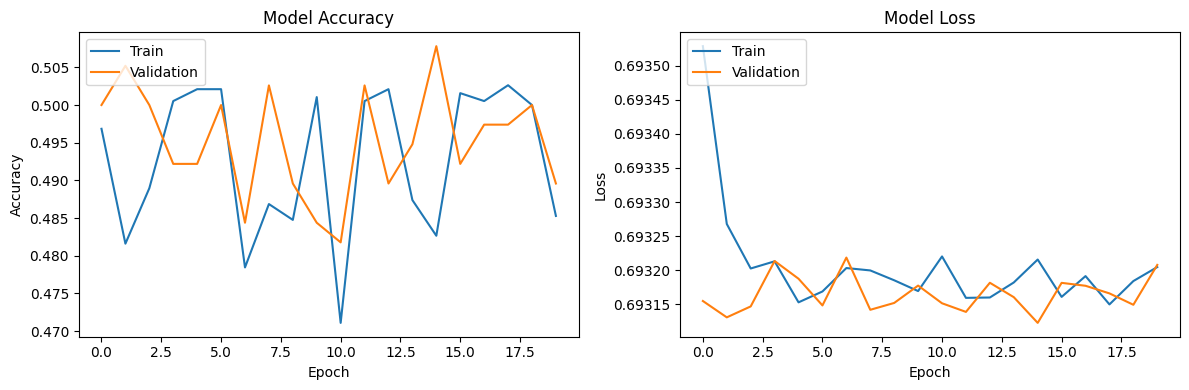

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [34]:
import numpy as np
import cv2 

X_test_resized = np.array([cv2.resize(img, (128, 128)) for img in X_test])  

X_test_resized = X_test_resized / 255.0  

test_loss, test_accuracy = model.evaluate(X_test_resized, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')


Test Accuracy: 0.5253
Test Loss: 0.6930


In [35]:
model.save('tumor_detection_model.h5')  

In [36]:
from keras.models import load_model

model = load_model('tumor_detection_model.h5')

In [37]:
from keras.preprocessing.image import ImageDataGenerator

new_datagen = ImageDataGenerator(rescale=1./255)

new_data_generator = new_datagen.flow_from_directory(
    'data_prediction', 
    target_size=(128, 128), 
    batch_size=32,
    class_mode='binary', 
    shuffle=False  
)

predictions = model.predict(new_data_generator)

predicted_classes = (predictions > 0.5).astype(int)

Found 2727 images belonging to 3 classes.
86/86 [==============================] - 56s 619ms/step


In [ ]:
import os
import cv2
import numpy as np
from keras.models import load_model

model = load_model('tumor_detection_model.h5') 

def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128)) 
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  
    
    prediction = model.predict(img)
    
    return "Yes Tumour" if prediction[0] > 0.5 else "No Tumour"

prediction_folder = 'data/data_prediction/prediction_tumour/'  
output_folder = 'data/data_prediction/prediction_results/'
os.makedirs(output_folder, exist_ok=True)

if os.path.exists(prediction_folder):
    for image_name in os.listdir(prediction_folder):
        if image_name.endswith('.jpg') or image_name.endswith('.png'):
            image_path = os.path.join(prediction_folder, image_name)

            prediction_result = predict_image(image_path)

            with open(os.path.join(output_folder, f'{image_name}_result.txt'), 'w') as f:
                f.write(prediction_result)